# Look at data

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pyrepseq as prs
import tidytcells as tt


/opt/anaconda3/envs/cruk_datathon/lib/python3.12/site-packages/logomaker/../tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#move to correct directory
os.chdir('/Users/isabellasodi/Documents/UCL/PhD/CRUK_datathon_2025')

In [3]:
# load data
#tcr_data = pd.read_csv('input/tcrictionary_tabular.csv' )
tcr_data_raw = pd.read_csv('/Volumes/ritd-ag-project-rd0017-bmcha43/CRUK_datathon_2025/raw_data/tcrictionary_tabular.csv' )


## Pre-process

In [4]:
# expand out so that each study is a row
tcr_data_expanded = tcr_data_raw.assign(Studies=tcr_data_raw['Studies'].str.split(',')).explode('Studies')
tcr_data_expanded = tcr_data_expanded.reset_index(drop=True)
tcr_data_expanded['Studies'] = tcr_data_expanded['Studies'].str.strip()

In [5]:
# pre-process

# only human
tcr_data = tcr_data_expanded[ tcr_data_expanded['TCR species'] == 'HomoSapiens'].copy()

# only with epitopes
tcr_data = tcr_data[ ~tcr_data['epitope'].isna()].copy()
print(tcr_data['epitope'].nunique())

# remove anything after a + for some epitopes with PTM info
tcr_data['epitope_full'] = tcr_data['epitope']
tcr_data['epitope'] = tcr_data['epitope_full'].str.split('+').str[0].str.strip()


# remove *,  and X (based on amino acids) in alpha chain 
# use tidy t cells, go through and remove cells with not allowed
tcr_data['CDR3A'] = tcr_data['CDR3A'].apply(lambda x: tt.aa.standardize(x, log_failures=False) if pd.notna(x) else x)
tcr_data['CDR3B'] = tcr_data['CDR3B'].apply(lambda x: tt.aa.standardize(x, log_failures=False) if pd.notna(x) else x)


2729


In [6]:
# remove any class 2
tcr_data = tcr_data[tcr_data['MHC class'] != 2].copy()
tcr_data

,Studies,Assays,TCR species,CDR3A,CDR3B,TRAV,TRBV,epitope,MHCA,MHCB,MHC class,epitope_full
0,PMID:36134660,multimer/tetramer,HomoSapiens,NaN,CASTTGRDNEQFF,NaN,TRBV2,GILGFVFTL,HLA-A*02:01,B2M,1.0,GILGFVFTL
1,PMID:34793243,multimer/tetramer,HomoSapiens,CAASAIGGKLIF,CASSFGDSYNEQFF,TRAV29/DV5,TRBV5-4,LLDDFVEII,HLA-A*02:01,B2M,1.0,LLDDFVEII
2,10xGenomics,multimer/tetramer,HomoSapiens,CAMREGVNDYKLSF,CASSLSGTGIQPQHF,NaN,NaN,AVFDRKSDAK,HLA-A*11:01,B2M,1.0,AVFDRKSDAK
3,PMID:32793919,High throughput multiplexed assay,HomoSapiens,NaN,CASSAYEQYF,NaN,TRBV6-5,APKEIIFLEGETL,NaN,B2M,1.0,APKEIIFLEGETL
4,PMID:32184241,multimer/tetramer,HomoSapiens,NaN,CASSSPGAAETQYF,NaN,TRBV6-1,YVLDHLIVV,HLA-A*02:01,B2M,1.0,YVLDHLIVV
...,...,...,...,...,...,...,...,...,...,...,...,...
310971,PMID:32793919,High throughput multiplexed assay,HomoSapiens,NaN,CASSLAKGGGYTF,NaN,TRBV27,QLMCQPILLL,NaN,B2M,1.0,QLMCQPILLL
310972,PMID:32793919,High throughput multiplexed assay,HomoSapiens,NaN,CASSLLSVQETQYF,NaN,TRBV28,APHGVVFLHVTYV,NaN,B2M,1.0,APHGVVFLHVTYV
310973,PMID:28423320,multimer/tetramer,HomoSapiens,NaN,CSVDKGGPEAFF,NaN,TRBV29-1,NLVPMVATV,HLA-A*02:01,B2M,1.0,NLVPMVATV
310974,PMID:32793919,High throughput multiplexed assay,HomoSapiens,NaN,CASSSSGGGISPLHF,NaN,TRBV7-8,LITLATCELYHYQECV,NaN,B2M,1.0,LITLATCELYHYQECV


In [7]:
# check how many will be lost from no MHC data
missing_mhc = tcr_data[tcr_data['MHC class'].isna()]
print( missing_mhc['epitope'].nunique() )
missing_mhc

262


,Studies,Assays,TCR species,CDR3A,CDR3B,TRAV,TRBV,epitope,MHCA,MHCB,MHC class,epitope_full
57,PMID:34006597,3H-thymidine,HomoSapiens,NaN,CASSRHPPSLAGVMYEQYF,NaN,TRBV6-5*01,RFASVYAWNRKRISNCVADY,NaN,NaN,NaN,RFASVYAWNRKRISNCVADY
87,PMID:30737354,multimer/tetramer,HomoSapiens,NaN,CASSTGESDTQYF,NaN,TRBV6-4,RTQSPRRR,NaN,NaN,NaN,RTQSPRRR
147,PMID:22942431,3H-thymidine,HomoSapiens,CAASRSTGGFKTIF,CSAKYVNTEAFF,TRAV13-1*02,TRBV20-1,VDSITEVECFLTPEA,NaN,NaN,NaN,VDSITEVECFLTPEA
150,PMID:31501610,3H-thymidine,HomoSapiens,NaN,CASGFTDTQYF,NaN,TRBV2,GKAPRLLIHYTSALQPGI,NaN,NaN,NaN,GKAPRLLIHYTSALQPGI
162,PMID:34061349,ELISA,HomoSapiens,NaN,CASSTRGHNTGELFF,NaN,TRBV5-1,NCTFEYVSQPFLMDL,NaN,NaN,NaN,NCTFEYVSQPFLMDL
...,...,...,...,...,...,...,...,...,...,...,...,...
310516,PMID:21199956,3H-thymidine,HomoSapiens,CAASSFGNEKLTF,CATSALGDTQYF,TRAV13-1*01,TRBV7-3*01,ENPVVHGFKNIVTPR,NaN,NaN,NaN,ENPVVHGFKNIVTPR
310614,PMID:21849672,multimer/tetramer,HomoSapiens,NaN,CASSLATRATYEQYF,NaN,TRBV7-2*01,PQPQLPYPQPQ,NaN,NaN,NaN,"PQPQLPYPQPQ + DEAM(Q4, Q11)"
310667,PMID:30737354,multimer/tetramer,HomoSapiens,NaN,CASSQAGTGSGNTIYF,NaN,TRBV4-1*01,RTQSPRRR,NaN,NaN,NaN,RTQSPRRR
310865,PMID:21849672,multimer/tetramer,HomoSapiens,NaN,CASSLGGLLYEQYF,NaN,TRBV7-2*02,QLQPFPQPQLPY,NaN,NaN,NaN,QLQPFPQPQLPY + DEAM(Q9)


In [8]:
# only class 1
tcr_data = tcr_data[tcr_data['MHC class'] == 1]
tcr_data

print(tcr_data['epitope'].nunique())

2108


## Check lengths of CDR3A/B/epitope

In [18]:
tcr_data['CDR3A_length'] = tcr_data['CDR3A'].str.len().astype('Int64')
tcr_data['CDR3B_length'] = tcr_data['CDR3B'].str.len().astype('Int64')
tcr_data['epitope_length'] = tcr_data['epitope'].str.len().astype('Int64')

/var/folders/z4/vmbnstn56s95frrrpfw8xlt00000gn/T/ipykernel_57161/381828953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcr_data['CDR3A_length'] = tcr_data['CDR3A'].str.len().astype('Int64')
/var/folders/z4/vmbnstn56s95frrrpfw8xlt00000gn/T/ipykernel_57161/381828953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcr_data['CDR3B_length'] = tcr_data['CDR3B'].str.len().astype('Int64')
/var/folders/z4/vmbnstn56s95frrrpfw8xlt00000gn/T/ipykernel_57161/381828953.py:3: SettingWithCopyWarning: 
A value is

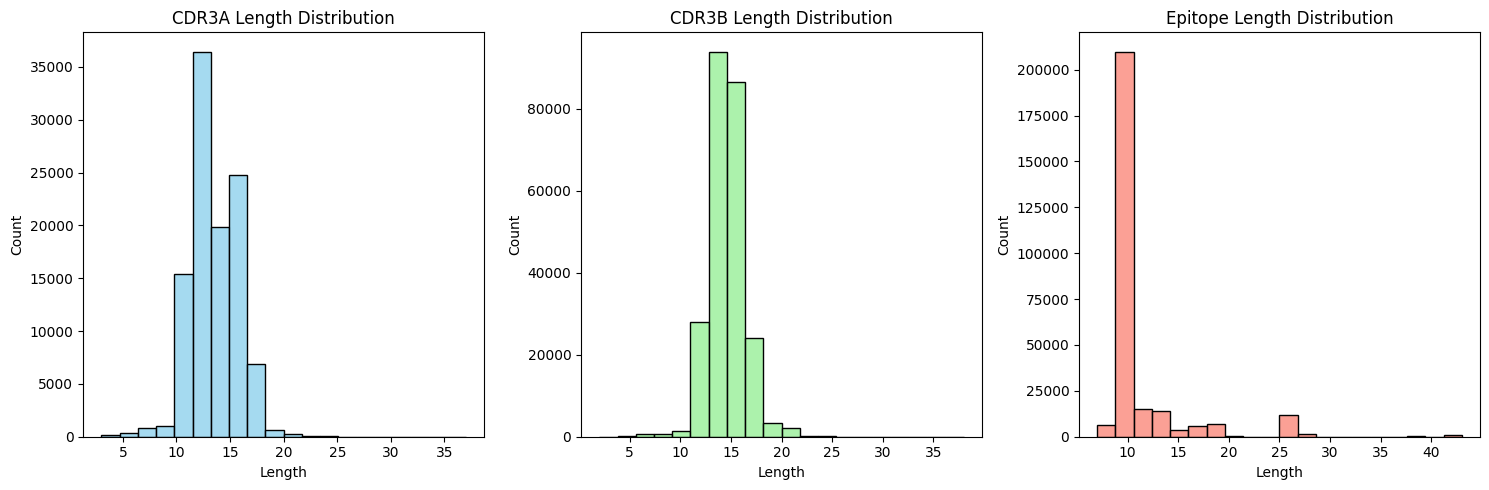

In [19]:
# frequency plot

# Set up the figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms
sns.histplot(data=tcr_data, x='CDR3A_length', ax=ax1, bins=20, color='skyblue')
ax1.set_title('CDR3A Length Distribution')
ax1.set_xlabel('Length')
ax1.set_ylabel('Count')

sns.histplot(data=tcr_data, x='CDR3B_length', ax=ax2, bins=20, color='lightgreen')
ax2.set_title('CDR3B Length Distribution')
ax2.set_xlabel('Length')
ax2.set_ylabel('Count')

sns.histplot(data=tcr_data, x='epitope_length', ax=ax3, bins=20, color='salmon')
ax3.set_title('Epitope Length Distribution')
ax3.set_xlabel('Length')
ax3.set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

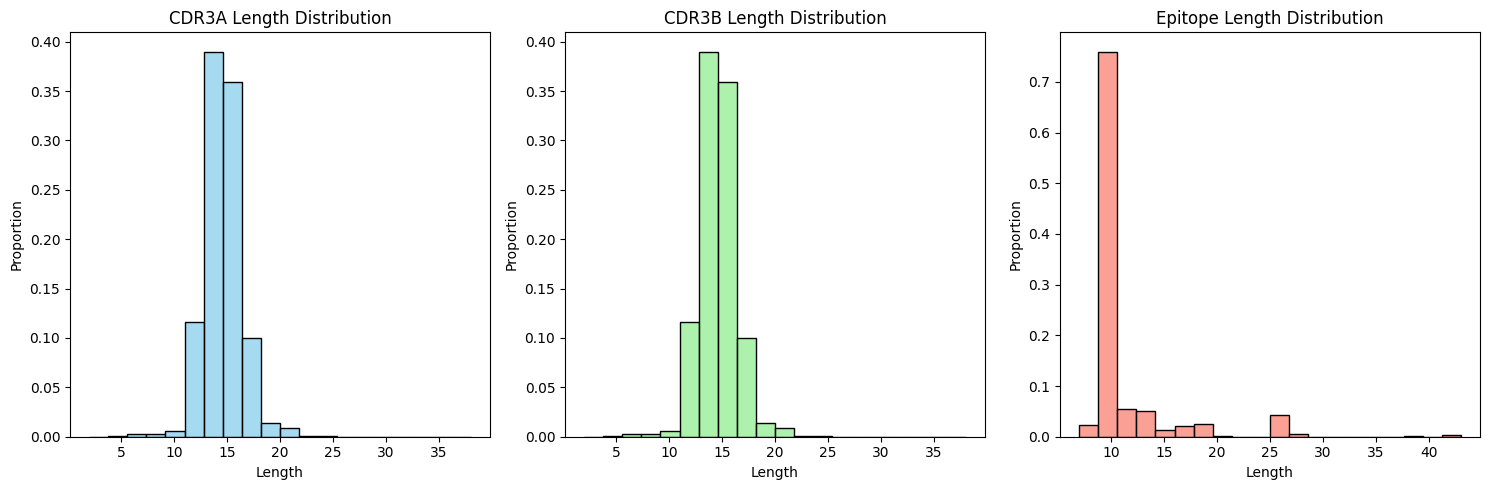

In [20]:
# propotion plot

# Set up the figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms with proportions
sns.histplot(data=tcr_data, x='CDR3B_length', ax=ax1, bins=20, color='skyblue', stat="proportion")
ax1.set_title('CDR3A Length Distribution')
ax1.set_xlabel('Length')
ax1.set_ylabel('Proportion')

sns.histplot(data=tcr_data, x='CDR3B_length', ax=ax2, bins=20, color='lightgreen', stat="proportion")
ax2.set_title('CDR3B Length Distribution')
ax2.set_xlabel('Length')
ax2.set_ylabel('Proportion')

sns.histplot(data=tcr_data, x='epitope_length', ax=ax3, bins=20, color='salmon', stat="proportion")
ax3.set_title('Epitope Length Distribution')
ax3.set_xlabel('Length')
ax3.set_ylabel('Proportion')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Check unique values

In [21]:
print( 'CDR3A',tcr_data['CDR3A'].nunique())
print( 'CDR3B',tcr_data['CDR3B'].nunique())
print( 'epitope',tcr_data['epitope'].nunique())

CDR3A 48181
CDR3B 156671
epitope 2108


CDR3A - unique sequences: 48181
Total sequences: 276113 Unique sequences: 48181

CDR3B - unique sequences: 156671
Total sequences: 276113 Unique sequences: 156671

Epitopes - unique sequences: 2108
Total sequences: 276113 Unique sequences: 2108


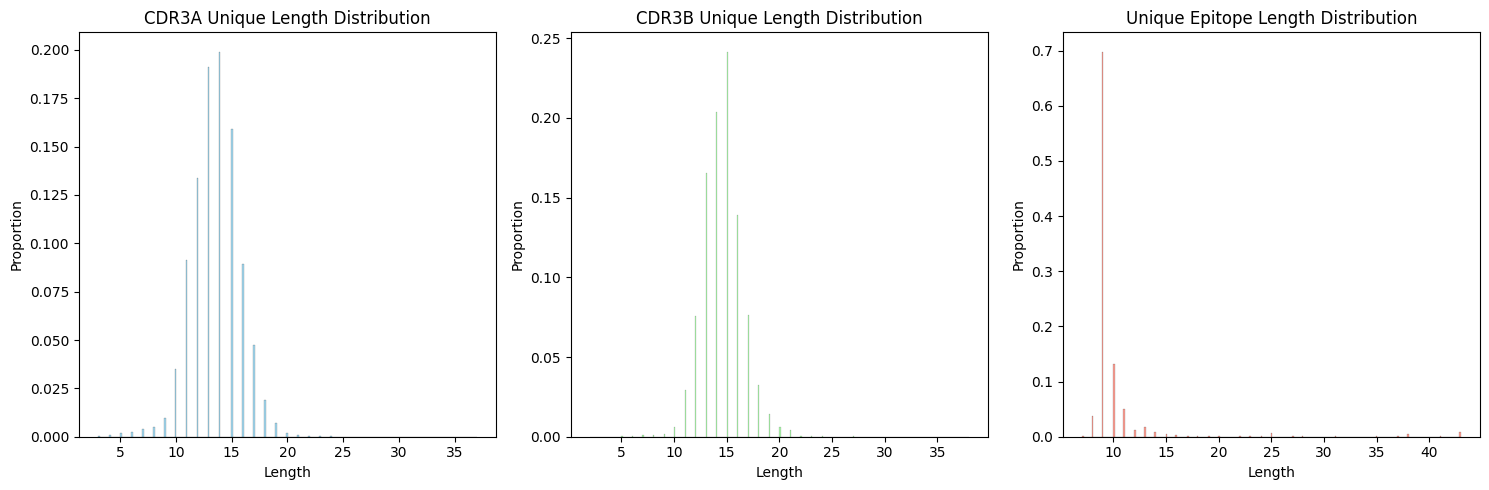

In [22]:
# Get unique sequences and their lengths
unique_cdr3a = tcr_data[['CDR3A', 'CDR3A_length']].dropna().drop_duplicates()
unique_cdr3b = tcr_data[['CDR3B', 'CDR3B_length']].dropna().drop_duplicates()
unique_epitopes = tcr_data[['epitope', 'epitope_length']].dropna().drop_duplicates()

# Print statistics
print("CDR3A - unique sequences:", tcr_data['CDR3A'].nunique())
print("Total sequences:", len(tcr_data), "Unique sequences:", len(unique_cdr3a))

print("\nCDR3B - unique sequences:", tcr_data['CDR3B'].nunique())
print("Total sequences:", len(tcr_data), "Unique sequences:", len(unique_cdr3b))

print("\nEpitopes - unique sequences:", tcr_data['epitope'].nunique())
print("Total sequences:", len(tcr_data), "Unique sequences:", len(unique_epitopes))

# Create plot with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms for unique sequences
sns.histplot(data=unique_cdr3a, x='CDR3A_length', ax=ax1, color='skyblue', stat="proportion")
ax1.set_title('CDR3A Unique Length Distribution')
ax1.set_xlabel('Length')
ax1.set_ylabel('Proportion')

sns.histplot(data=unique_cdr3b, x='CDR3B_length', ax=ax2, color='lightgreen', stat="proportion")
ax2.set_title('CDR3B Unique Length Distribution')
ax2.set_xlabel('Length')
ax2.set_ylabel('Proportion')

sns.histplot(data=unique_epitopes, x='epitope_length', ax=ax3, color='salmon', stat="proportion")
ax3.set_title('Unique Epitope Length Distribution')
ax3.set_xlabel('Length')
ax3.set_ylabel('Proportion')

plt.tight_layout()
plt.show()

## Check Studies

In [23]:
print( 'Studies',tcr_data['Studies'].nunique())

Studies 393


Potential studies for validation:

- PMID:38039963
    - Phenotypic signatures of circulating neoantigenreactive CD8+ T cells in patients with metastatic cancers
    - has 14 epitopes and 45 TCRs

- PMID:27959684
    - T-Cell Transfer Therapy Targeting Mutant KRAS in Cancer
    - has 1 epitope and 5 TCRs

- PMID:32461371
    - High-affinity oligoclonal TCRs define effective adoptive T cell therapy targeting mutant KRAS-G12D
    - has 2 epitopes and 4 TCRs




In [24]:
# alphabet_studies = ['PMID:38039963', 'PMID:27959684', 'PMID:32461371']
# study_pattern = '|'.join(alphabet_studies)

# tcr_data_alphabet_studies = tcr_data[tcr_data['Studies'].str.contains(study_pattern, na=False)]

# Split

In [25]:
# remove cancer studies
cancer_studies = ['PMID:38039963', 'PMID:27959684', 'PMID:32461371']
#study_pattern = '|'.join(cancer_studies)

tcr_data_cancer = tcr_data[ tcr_data['Studies'].isin(cancer_studies)] # need to do str match for multiple studies
#tcr_data_cancer = tcr_data[tcr_data['Studies'].str.contains(study_pattern, na=False)] # no need as now expanded

tcr_data_train = tcr_data[ ~tcr_data['Studies'].isin(cancer_studies)]
#tcr_data_train = tcr_data[~tcr_data['Studies'].str.contains(study_pattern, na=False)]

print('Training')
print('epitopes:', tcr_data_train['epitope'].nunique())
print('alpha:', tcr_data_train['CDR3A'].nunique())
print('beta:', tcr_data_train['CDR3B'].nunique(), '\n')

print('Cancer')
print('epitopes:', tcr_data_cancer['epitope'].nunique())
print('alpha:', tcr_data_cancer['CDR3A'].nunique())
print('beta:', tcr_data_cancer['CDR3B'].nunique())


Training
epitopes: 2094
alpha: 48141
beta: 156630 

Cancer
epitopes: 15
alpha: 44
beta: 47


In [26]:
# check if cancer epitopes are in train

cancer_epitopes = tcr_data_cancer['epitope'].unique()
print(cancer_epitopes)
print( len(cancer_epitopes))

epitope_pattern = '|'.join(cancer_epitopes)
leaking_epitopes = tcr_data_train[tcr_data_train['epitope'].str.contains(epitope_pattern, na=False)]

print('leaking epitopes:', len(leaking_epitopes))
print( leaking_epitopes['epitope'], '\n')

# remove leaking epitopes in train
tcr_data_train = tcr_data_train[~tcr_data_train['epitope'].str.contains(epitope_pattern, na=False)]
tcr_data_train

# add leaking epitopes to validate
tcr_data_cancer = pd.concat([tcr_data_cancer, leaking_epitopes])

print('Training')
print('epitopes:', tcr_data_train['epitope'].nunique())
print('alpha:', tcr_data_train['CDR3A'].nunique())
print('beta:', tcr_data_train['CDR3B'].nunique(), '\n')

print('Cancer (w/ leaking)')
print('epitopes:', tcr_data_cancer['epitope'].nunique())
print('alpha:', tcr_data_cancer['CDR3A'].nunique())
print('beta:', tcr_data_cancer['CDR3B'].nunique())

['VLVIASTDVDKTAASYYGEQTLHYI' 'SEQTFLIGL' 'RGSTDNLMDDIEMAVDDGVNTFKVL'
 'NENLDLKEL' 'NENLDLQEL' 'INPVVHPHGHIFTVYTDVQQVASSL' 'GADGVGKSA'
 'NLWPVTHGL' 'DLYHLIKKAVAVQKHLERNRKDKDA' 'GADGVGKSAL'
 'ATDALKNRSSVEARMEFVRQALAYL' 'TRLRKQALQDTLVLYKMFSEADACE'
 'YWNQGYGYQQGYEPGYGGYDYSPYG' 'TEFFPFYAL' 'RKAMEAVAAQGKTKK']
15
leaking epitopes: 4
88041                   GADGVGKSAL
88042                   GADGVGKSAL
193912                  GADGVGKSAL
253496    MTEYKLVVVGADGVGKSALTIQLI
Name: epitope, dtype: object 

Training
epitopes: 2092
alpha: 48140
beta: 156629 

Cancer (w/ leaking)
epitopes: 16
alpha: 44
beta: 47


In [27]:
# remove additional 10% of epitopes
all_epitopes = tcr_data_train[['epitope', 'epitope_length']].drop_duplicates()
print('Unique epitopes in train/test:', tcr_data_train['epitope'].nunique(), '\n')

test_epitopes = all_epitopes.sample( round(len(all_epitopes)*0.1 ), random_state=27)
print('Unique epitopes in test:', test_epitopes['epitope'].nunique(), '\n')
# validation_random_epitopes['epitope'].nunique() # not sure why has 193

tcr_data_test = tcr_data_train[ tcr_data_train['epitope'].isin(test_epitopes['epitope'])]

assert test_epitopes['epitope'].nunique() == 209

tcr_data_train = tcr_data_train[ ~tcr_data_train['epitope'].isin(test_epitopes['epitope'])]

print('Training')
print('epitopes:', tcr_data_train['epitope'].nunique())
print('alpha:', tcr_data_train['CDR3A'].nunique())
print('beta:', tcr_data_train['CDR3B'].nunique(), '\n')

print('Test')
print('epitopes:', tcr_data_test['epitope'].nunique())
print('alpha:', tcr_data_test['CDR3A'].nunique())
print('beta:', tcr_data_test['CDR3B'].nunique())


Unique epitopes in train/test: 2092 

Unique epitopes in test: 209 

Training
epitopes: 1883
alpha: 46421
beta: 139785 

Test
epitopes: 209
alpha: 2403
beta: 18352


In [28]:
# check if test epitopes are in train (leaking)

test_epitopes = tcr_data_test['epitope'].unique()
print('test epitopes:', len(test_epitopes))
print(test_epitopes[1:10])

epitope_pattern = '|'.join(test_epitopes)
leaking_epitopes = tcr_data_train[tcr_data_train['epitope'].str.contains(epitope_pattern, na=False)]

print('leaking epitopes:', leaking_epitopes['epitope'].nunique)
print( leaking_epitopes['epitope'].unique, '\n')

# remove leaking epitopes in train
tcr_data_train = tcr_data_train[~tcr_data_train['epitope'].str.contains(epitope_pattern, na=False)]
tcr_data_train

# add leaking epitopes to validate
tcr_data_test = pd.concat([tcr_data_test, leaking_epitopes])

print('Training')
print('epitopes:', tcr_data_train['epitope'].nunique())
print('alpha:', tcr_data_train['CDR3A'].nunique())
print('beta:', tcr_data_train['CDR3B'].nunique(), '\n')

print('Cancer (w/ leaking)')
print('epitopes:', tcr_data_test['epitope'].nunique())
print('alpha:', tcr_data_test['CDR3A'].nunique())
print('beta:', tcr_data_test['CDR3B'].nunique())

test epitopes: 209
['YERMCNIL' 'FLWLLWPVTLACFVLAAV' 'LLWNGPMAV' 'FVCNLLLLFVTVYSHLLLV'
 'ELAGIGILTV' 'LPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERD' 'LLLDDFVEII'
 'YTVELGTEV' 'FVDGVPFVV']
leaking epitopes: <bound method IndexOpsMixin.nunique of 189        YEDFLEYHDVRVVL
241          GYQPYRVVVLSF
545        YEDFLEYHDVRVVL
564       VLPPLLTDEMIAQYT
820       VLPPLLTDEMIAQYT
               ...       
310303       GYQPYRVVVLSF
310457      LITGRLQSLQTYV
310514     YEDFLEYHDVRVVL
310827     YEDFLEYHDVRVVL
310935      LITGRLQSLQTYV
Name: epitope, Length: 2330, dtype: object>
<bound method Series.unique of 189        YEDFLEYHDVRVVL
241          GYQPYRVVVLSF
545        YEDFLEYHDVRVVL
564       VLPPLLTDEMIAQYT
820       VLPPLLTDEMIAQYT
               ...       
310303       GYQPYRVVVLSF
310457      LITGRLQSLQTYV
310514     YEDFLEYHDVRVVL
310827     YEDFLEYHDVRVVL
310935      LITGRLQSLQTYV
Name: epitope, Length: 2330, dtype: object> 

Training
epitopes: 1862
alpha: 46390
beta: 137641 

Cancer (w/ le

In [30]:
print('Training')
print('epitopes:', tcr_data_train['epitope'].nunique())
print('alpha:', tcr_data_train['CDR3A'].nunique())
print('beta:', tcr_data_train['CDR3B'].nunique(), '\n')

print('Test')
print('epitopes:', tcr_data_test['epitope'].nunique())
print('alpha:', tcr_data_test['CDR3A'].nunique())
print('beta:', tcr_data_test['CDR3B'].nunique(), '\n')

print('Cancer Test')
print('epitopes:', tcr_data_cancer['epitope'].nunique())
print('alpha:', tcr_data_cancer['CDR3A'].nunique())
print('beta:', tcr_data_cancer['CDR3B'].nunique())

Training
epitopes: 1862
alpha: 46390
beta: 137641 

Test
epitopes: 230
alpha: 2438
beta: 20587 

Cancer Test
epitopes: 16
alpha: 44
beta: 47


# Check lengths for potential filtering

In [41]:
mode_CDR3A = tcr_data['CDR3A_length'].value_counts().index[0]
mode_CDR3B = tcr_data['CDR3B_length'].value_counts().index[0]
mode_epitope = tcr_data['epitope_length'].value_counts().index[0]

print( mode_CDR3A, mode_CDR3B, mode_epitope)

13 15 9


In [43]:
filter_a = tcr_data[tcr_data['CDR3A_length'] == mode_CDR3A]
filter_b = filter_a[filter_a['CDR3B_length'] == mode_CDR3B]
filter_epitope = filter_b[filter_b['epitope_length'] == mode_epitope]



In [45]:
filter_epitope['epitope'].nunique()

178

In [47]:
filter_epitope['epitope'].value_counts().head(20)

epitope
KLGGALQAK    1408
GILGFVFTL      89
IVTDFSVIK      88
GLCTLVAML      67
SPRWYFYYL      45
RLRAEAQVK      43
VMATRRNVL      40
NLVPMVATV      36
LLWNGPMAV      34
NQKLIANQF      21
YLQPRTFLL      18
YVLDHLIVV      15
KTFPPTEPK      13
CINGVCWTV      12
CTELKLSDY      10
VMTTVLATL      10
LTDEMIAQY       9
ATDALMTGF       9
QYIKWPWYI       8
RPRGEVRFL       7
Name: count, dtype: int64

## Filter just on CDR3B

In [54]:
filter_b = tcr_data[tcr_data['CDR3B_length'] == mode_CDR3B]
filter_epitope = filter_b[filter_b['epitope_length'] == mode_epitope]

In [55]:
filter_epitope['epitope'].nunique()

757

In [59]:
filter_epitope['CDR3B'].nunique()

18205

In [56]:
filter_epitope['epitope'].value_counts().head(20)

epitope
KLGGALQAK    7855
YVLDHLIVV    4530
GLCTLVAML    2828
GILGFVFTL    2440
NLVPMVATV    2434
FLNGSCGSV     770
LLWNGPMAV     632
FVDGVPFVV     588
IVTDFSVIK     586
KLSYGIATV     533
VMATRRNVL     385
SPRWYFYYL     355
LLLDRLNQL     323
MPASWVMRI     249
FLPRVFSAV     231
KAYNVTQAF     230
RQLLFVVEV     225
RLRAEAQVK     223
FPPTSFGPL     194
ATDALMTGY     180
Name: count, dtype: int64

# Filtering

In [31]:
print('epitopes:', tcr_data_train['epitope'].nunique())
print('alpha:', tcr_data_train['CDR3A'].nunique())
print('beta:', tcr_data_train['CDR3B'].nunique())

tcr_data_train_unfiltered = tcr_data_train.copy()

epitopes: 1862
alpha: 46390
beta: 137641


In [32]:
# Matt found paper supporting epitopes between 8-13 (PMID:26783342 )
num_pre_filter = tcr_data_train['epitope'].nunique()
print('pre length filter:', num_pre_filter)

# filter any epitopes 13 or longer
tcr_data_train = tcr_data_train[ tcr_data_train['epitope_length'] < 14 ].copy()

# filter any less than 8
tcr_data_train = tcr_data_train[ tcr_data_train['epitope_length'] > 7 ]

num_post_filter = tcr_data_train['epitope'].nunique()
print('post length filter:', num_post_filter)
print('removed:', num_pre_filter - num_post_filter)


pre length filter: 1862
post length filter: 1782
removed: 80


In [33]:
print('epitopes:', tcr_data_train['epitope'].nunique())
print('alpha:', tcr_data_train['CDR3A'].nunique())
print('beta:', tcr_data_train['CDR3B'].nunique())

epitopes: 1782
alpha: 46383
beta: 108982


In [22]:
# filter CDR3A
mean = tcr_data_train['CDR3A_length'].mean()
std = tcr_data_train['CDR3A_length'].std()
lower_bound = round(mean - 2*std)
upper_bound = round(mean + 2*std)
print('mean: ', mean)
print('std: ', std)
print('LB: ', lower_bound)
print('UB: ', upper_bound)

num_pre_filter = tcr_data_train['CDR3A'].nunique()
print('pre length filter:', num_pre_filter)

# filter
tcr_data_train = tcr_data_train[
    (tcr_data_train['CDR3A_length'].isna()) |  # ignore NA values
    (tcr_data_train['CDR3A_length'] >= lower_bound) & 
    (tcr_data_train['CDR3A_length'] <= upper_bound)
]

num_post_filter = tcr_data_train['CDR3A'].nunique()
print('post length filter:', num_post_filter)
print('removed:', num_pre_filter - num_post_filter)

mean:  13.504730150672604
std:  2.1012247457928215
LB:  9
UB:  18


pre length filter: 46414
post length filter: 45257
removed: 1157


In [23]:
print('epitopes:', tcr_data_train['epitope'].nunique())
print('alpha:', tcr_data_train['CDR3A'].nunique())
print('beta:', tcr_data_train['CDR3B'].nunique())

epitopes: 1773
alpha: 45257
beta: 109101


In [24]:
# filter CDR3B
mean = tcr_data_train['CDR3B_length'].mean()
std = tcr_data_train['CDR3B_length'].std()
lower_bound = round(mean - 2*std)
upper_bound = round(mean + 2*std)
print('mean: ', mean)
print('std: ', std)
print('LB: ', lower_bound)
print('UB: ', upper_bound)

num_pre_filter = tcr_data_train['CDR3B'].nunique()
print('pre length filter:', num_pre_filter)

# filter
tcr_data_train = tcr_data_train[
    (tcr_data_train['CDR3B_length'].isna()) |  # ignore NA values
    (tcr_data_train['CDR3B_length'] >= lower_bound) & 
    (tcr_data_train['CDR3B_length'] <= upper_bound)
]

num_post_filter = tcr_data_train['CDR3B'].nunique()
print('post length filter:', num_post_filter)
print('removed:', num_pre_filter - num_post_filter)

mean:  14.442906635246118
std:  1.931772916523878
LB:  11
UB:  18
pre length filter: 109101
post length filter: 104843
removed: 4258


In [25]:
print('epitopes:', tcr_data_train['epitope'].nunique())
print('alpha:', tcr_data_train['CDR3A'].nunique())
print('beta:', tcr_data_train['CDR3B'].nunique())

epitopes: 1735
alpha: 44588
beta: 104843


In [26]:
paired_data = tcr_data_train[['CDR3A', 'CDR3B', 'epitope']].dropna()
#paired_data

# check how many paired we have
print('epitopes:', paired_data['epitope'].nunique())
print('alpha:', paired_data['CDR3A'].nunique())
print('beta:', paired_data['CDR3B'].nunique())

epitopes: 1334
alpha: 23087
beta: 24899


# Chunk amino acids

In [27]:
# select 5 amino acids for CDR3 and epitope

def get_middle_five_left(aa_string):
    if pd.isna(aa_string):  # Check for NaN/null values
        return aa_string
    length = len(aa_string)
    
    if( length % 2 == 0 ):
            mid = length // 2 # integer division will ensure that doesnt matter if even or odd - it is floor so always rounds down
            start = mid - 3
            end = mid + 2
    else:
            mid = length // 2
            start = mid - 2
            end = mid + 3

    return aa_string[start:end]

tcr_data_train['CDR3A_middle_left'] = tcr_data_train['CDR3A'].apply(get_middle_five_left)
tcr_data_train['CDR3B_middle_left'] = tcr_data_train['CDR3B'].apply(get_middle_five_left)
tcr_data_train['epitope_middle_left'] = tcr_data_train['epitope'].apply(get_middle_five_left)

In [28]:
def get_middle_five_right(aa_string):
    if pd.isna(aa_string):  # Check for NaN/null values
        return aa_string
    length = len(aa_string)
    
    if( length % 2 == 0 ):
            mid = length // 2 # integer division will ensure that doesnt matter if even or odd - it is floor so always rounds down
            start = mid - 2
            end = mid + 3
    else:
            mid = length // 2
            start = mid - 2
            end = mid + 3

    return aa_string[start:end]

tcr_data_train['CDR3A_middle_right'] = tcr_data_train['CDR3A'].apply(get_middle_five_right)
tcr_data_train['CDR3B_middle_right'] = tcr_data_train['CDR3B'].apply(get_middle_five_right)
tcr_data_train['epitope_middle_right'] = tcr_data_train['epitope'].apply(get_middle_five_right)

In [29]:
split_types = ['left', 'right']
regions_to_test = ['CDR3A', 'CDR3B', 'epitope']
splits_to_make = []
for region in regions_to_test:
    best_score = -np.inf
    best_split_type = ''
    for split in split_types:
        richness = len(tcr_data_train[f'{region}_middle_{split}'].dropna(inplace=False).unique())
        print(region, split, richness)
        if richness > best_score:
            best_score = richness
            best_split_type = split
        splits_to_make.append(best_split_type)

CDR3A left 18664
CDR3A right 14700
CDR3B left 64976
CDR3B right 61618
epitope left 1543
epitope right 1547


In [30]:
tcr_data_train['CDR3A_middle'] = tcr_data_train['CDR3A_middle_left']
tcr_data_train['CDR3B_middle'] = tcr_data_train['CDR3B_middle_left']
tcr_data_train['epitope_middle'] = tcr_data_train['epitope_middle_right']

# Save

In [35]:
tcr_data_save = tcr_data_train[['CDR3A_middle', 'CDR3B_middle', 'epitope_middle', 'Assays']]
tcr_data_save = tcr_data_save.rename( columns = {'CDR3A_middle':'CDR3A', 'CDR3B_middle':'CDR3B', 'epitope_middle':'epitope'} )
tcr_data_save.to_csv('/Volumes/ritd-ag-project-rd0017-bmcha43/CRUK_datathon_2025/processed_data/train.csv')

In [ ]:
# make important columns the left most